## [Dataset](https://www.kaggle.com/datasets/rounakbanik/ted-talks)

In [1]:
import pandas as pd

df = pd.read_csv("..\\data\\dataset_for_lab07\\ted_main.csv")
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Завантаження необхідних ресурсів NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Функція для попередньої обробки тексту
def preprocess_text(text):
    # Перетворення на нижній регістр
    text = text.lower()

    # Видалення спеціальних символів та пунктуації
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Токенізація
    tokens = word_tokenize(text)

    # Видалення стоп-слів
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Лематизація
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Тестування на одному з описів
df['processed_description'] = df['description'].apply(preprocess_text)
print(df[['description', 'processed_description']].head().to_string())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sviat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sviat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sviat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                                                                                                                                                                                                 description                                                                                                                                                                          processed_description
0                                                                                      Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.                                                       [sir, ken, robinson, make, entertaining, profoundly, moving, case, creating, education, system, nurture, rather, undermines, creativity]
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Ініціалізація аналізатора
sia = SentimentIntensityAnalyzer()

# Функція для аналізу настрою
def sentiment_analysis(text):
    return sia.polarity_scores(text)

# Додавання результатів аналізу настрою
df['sentiment'] = df['description'].apply(sentiment_analysis)
print(df[['description', 'sentiment']].head().to_string())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sviat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                                                                                                                                                                                                 description                                                        sentiment
0                                                                                      Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.     {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.8625}
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.    {'neg': 0.06, 'neu': 0.848, 'pos': 0.092, 'compound': 0.0772}
2                                 New York Times columnist David Pogue takes aim at technology

In [4]:
import spacy

# Завантаження моделі spacy для англ. мови
nlp = spacy.load('en_core_web_sm')

# Функція для розпізнавання іменованих сутностей
def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Додавання результатів NER
df['entities'] = df['description'].apply(named_entity_recognition)
print(df[['description', 'entities']].head().to_string())

                                                                                                                                                                                                                                 description                                                                   entities
0                                                                                      Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.                                                   [(Ken Robinson, PERSON)]
1  With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.  [(An Inconvenient Truth, WORK_OF_ART), (Al Gore, PERSON), (15, CARDINAL)]
2                                 New York Times columnist David

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Використовуємо тільки текст з обробленими даними
processed_text = df['processed_description'].apply(lambda x: ' '.join(x))

# BoW
vectorizer = CountVectorizer(max_features=100)
X_bow = vectorizer.fit_transform(processed_text)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = tfidf_vectorizer.fit_transform(processed_text)

# Виведення результатів BoW та TF-IDF
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(bow_df.head().to_string(), '\n\n')
print(tfidf_df.head().to_string())

   around  art  artist  asks  better  big  body  brain  build  building  call  case  change  city  come  could  country  create  data  day  design  dont  even  every  experience  explains  fellow  find  first  future  get  give  global  good  health  help  human  idea  kid  know  learn  life  like  live  look  love  make  many  may  might  much  need  new  often  one  part  people  personal  place  play  power  powerful  problem  project  question  research  right  say  school  science  see  share  show  simple  social  story  study  suggests  surprising  system  take  talk  technology  ted  tell  thats  thing  think  three  time  two  use  using  want  way  woman  work  world  year  yet
0       0    0       0     0       0    0     0      0      0         0     0     1       0     0     0      0        0       0     0    0       0     0     0      0           0         0       0     0      0       0    0     0       0     0       0     0      0     0    0     0      0     0     0     

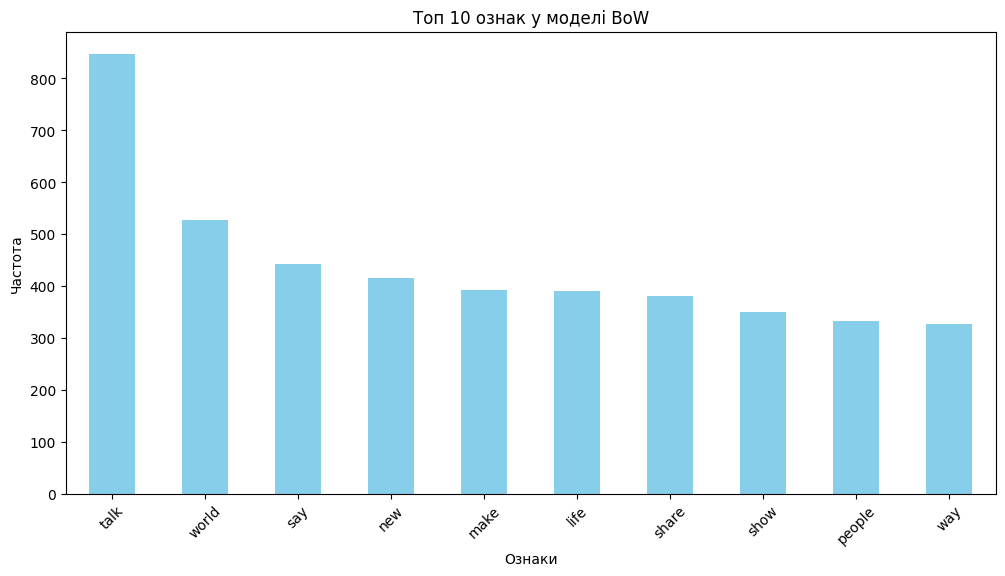

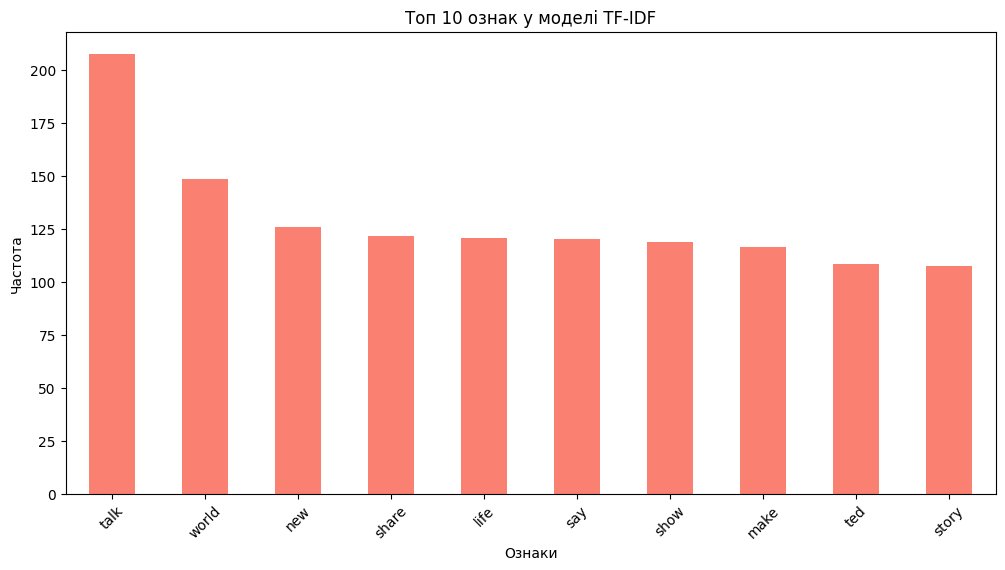

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bow_df.sum().sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title("Топ 10 ознак у моделі BoW")
plt.xlabel("Ознаки")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
tfidf_df.sum().sort_values(ascending=False).head(10).plot(kind='bar', color='salmon')
plt.title("Топ 10 ознак у моделі TF-IDF")
plt.xlabel("Ознаки")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

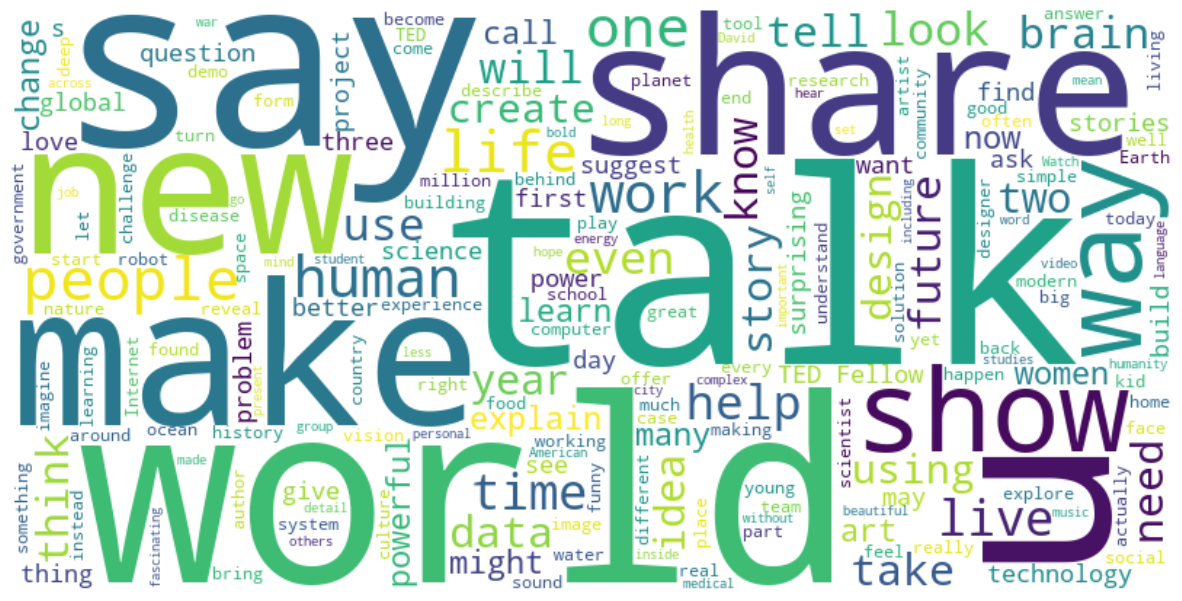

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Об'єднуємо всі текстові дані в один великий текст
all_text = ' '.join(df['description'].dropna())

# Генерація хмари слів
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Візуалізація хмари слів
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
# Підсумок аналізу настрою
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))
sentiment_counts = df['sentiment_label'].value_counts()

# Підсумок частоти сутностей
entities_flat = [entity for sublist in df['entities'] for entity in sublist]
entity_counts = pd.Series([e[0] for e in entities_flat]).value_counts()

print(sentiment_counts)
entity_counts.head()

sentiment_label
positive    1824
negative     592
neutral      134
Name: count, dtype: int64


first    117
one      113
two      112
three     82
TED       70
Name: count, dtype: int64